<a href="https://colab.research.google.com/github/aakashkumarme/TFLEARN/blob/main/4_1_Evaluate_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Evaluating a ML Model

3 Ways:



1.   Estimator Score Method
2.   Scoring parameter
3.   Problem Specific metric function



# **Estimator Score Method**  

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

heart_disease = pd.read_csv("/content/drive/MyDrive/dataset/heart-disease.csv")
 
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
 
np.random.seed(42)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_train,y_train) 

1.0

In [11]:
clf.score(X_test,y_test)

0.8524590163934426

### Lets do same on regressor method

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
boston = load_boston()

boston_df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

X = boston_df.drop("target" , axis=1)
y = boston_df["target"]
 
np.random.seed(42)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train,y_train)
clf.score(X_test,y_test) 

0.873969014117403

**Evaluate using Score parameter**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
boston = load_boston()

boston_df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

X = boston_df.drop("target" , axis=1)
y = boston_df["target"]
 
np.random.seed(42)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train,y_train);

In [21]:
clf.score(X_test,y_test)

0.873969014117403

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X,y , cv = 5)

array([0.77103891, 0.85536356, 0.74478532, 0.49398708, 0.30055591])

Default scoring parameter of classifier =  mean accuracy --
clf.score()

In [31]:
clf_cross_val_score_mean = np.mean(cross_val_score(clf,X,y , cv = 5))
clf_cross_val_score_mean

0.62328343727342

## **Evaluation metrics**


1.   Accuracy
2.   Area under ROC curve
3.   Confusion Matrix
4.   Classification report







# Accuracy

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

heart_disease = pd.read_csv("/content/drive/MyDrive/dataset/heart-disease.csv")
 
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
 
np.random.seed(42)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(clf,X,y,cv=5)
np.mean(cross_val_score)

0.811639344262295

In [43]:
print(f"Cross validated accuracy: {np.mean(cross_val_score) *100:.2f}%" )

Cross validated accuracy: 81.16%


### **Area under ROC / AUC curve**
This is comparison of models True positive rate and false positive rate

In [52]:
y_probs = clf.predict_proba(X_test)
y_probs[:10],len(y_probs)

(array([[0.89, 0.11],
        [0.49, 0.51],
        [0.43, 0.57],
        [0.84, 0.16],
        [0.18, 0.82],
        [0.14, 0.86],
        [0.36, 0.64],
        [0.95, 0.05],
        [0.99, 0.01],
        [0.47, 0.53]]), 61)

In [53]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [55]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

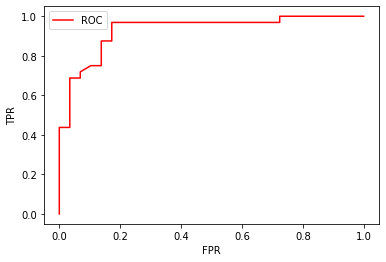

In [60]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr,color = "red" ,label = "ROC")
  #plt.plot([0,1],[0,1] , color = "darkblue",linestyle = "--" , label = "Guessing")
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.legend()
  plt.show()

plot_roc_curve(fpr,tpr)

In [64]:
#Plot perfect ROC curve and AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

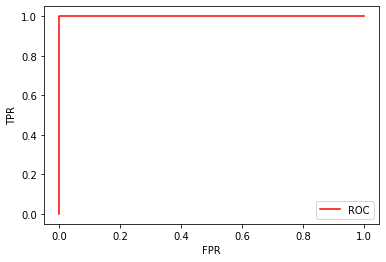

In [65]:
fpr,tpr,threshold = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

# ***Confustion Matrix***

In [66]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 4, 28]])

In [67]:
pd.crosstab(y_test,
            y_preds)

col_0,0,1
target,,
0,24,5
1,4,28


### ***Classification Report***

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



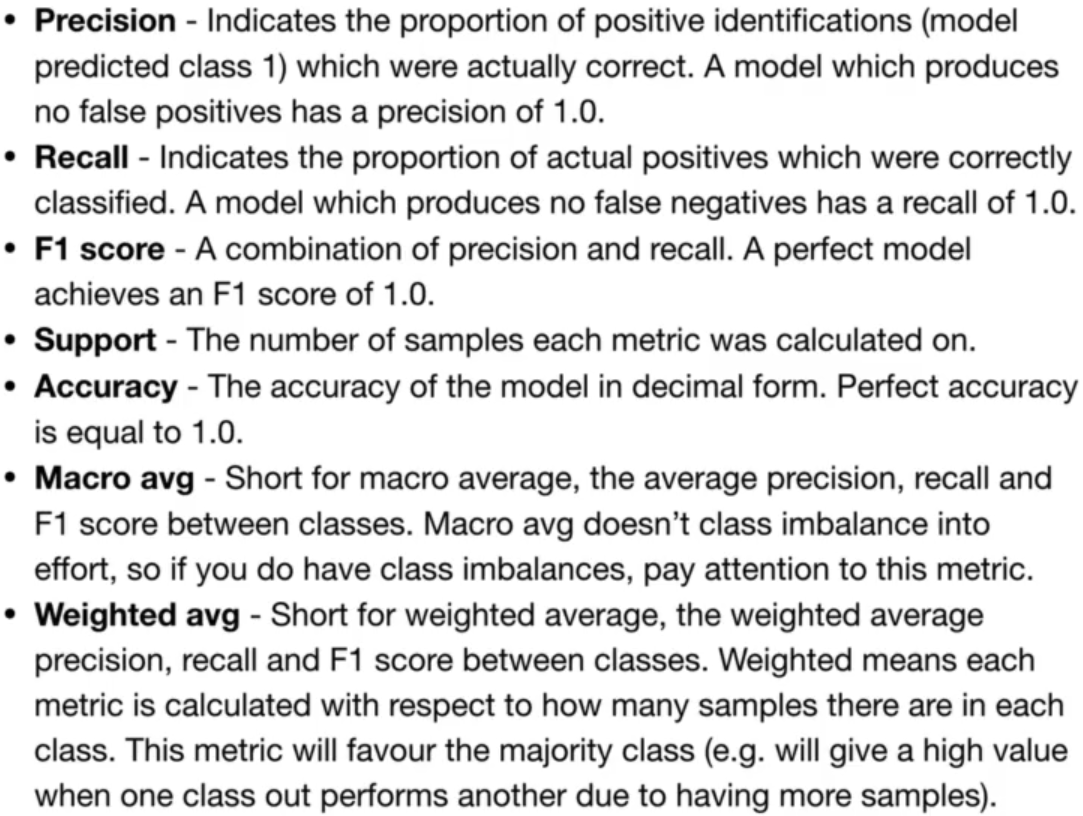